In [1]:
import matplotlib.pyplot as plt
from skimage import io, color, measure

In [2]:
def detect_letters(image_path):
    image = io.imread(image_path)
    gray = color.rgb2gray(image)
    threshold = gray < 0.5
    clean_image = measure.label(threshold)
    contours = measure.find_contours(clean_image, 0.8)
    
    detected_letters = []
    for contour in contours:
        y, x = contour[:, 0], contour[:, 1]
        ymin, ymax = int(min(x)), int(max(x))
        xmin, xmax = int(min(y)), int(max(y))
        width = xmax - xmin
        height = ymax - ymin
        area = width * height
        aspect_ratio = width / height
        if area > 100 and aspect_ratio > 0.2:
            detected_letters.append((xmin, ymin, width, height))
    
    return detected_letters

In [3]:
image_path = 'nama.jpg'

In [4]:
image = io.imread(image_path)

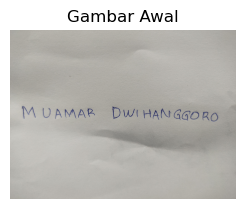

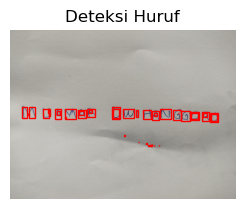

In [5]:
# Tampilkan gambar awal
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Gambar Awal')

plt.show()

detected_letters = detect_letters(image_path)

plt.subplot(1, 2, 2)
plt.imshow(image)
plt.axis('off')
plt.title('Deteksi Huruf')

for (x, y, width, height) in detected_letters:
    rect = plt.Rectangle((y, x), height, width, edgecolor='r', linewidth=1, fill=False)
    plt.gca().add_patch(rect)

# Tampilkan gambar yang telah dideteksi hurufnya
plt.show()